## Mushroom Classification


Project 4- By Amanda Arce & Tresanne Bonnick 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read file into pandas
mushrooms = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', sep= ",", header = None)

In [3]:
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroomsrel = mushrooms[[0, 5, 22]]
mushroomsrel.head()

,0,5,22
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g


In [5]:
#Rename all columns
mushroomsrel.rename(columns={0 :'Poisionous/edible', 5 : 'Odor', 22 : 'Habitat'}, inplace=True)
mushroomsrel.columns

C:\Users\manda\Anaconda3\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Index(['Poisionous/edible', 'Odor', 'Habitat'], dtype='object')

In [6]:
mushroomsrel.head()

,Poisionous/edible,Odor,Habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g


>Convert codes to numerical values - for Poisionous/edible column 0 - edible and 1 - poisionous

>Original key values for Odor - almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

>Changed key values - almond=200, anise=300,creosote=400,fishy=500,foul=600, musty=700,none=800,pungent=900,spicy=1000

>Original key values for Habitat -  grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [7]:
mushroomsrel.replace(to_replace={"Poisionous/edible":{'p': 1, 'e': 0}}, inplace=True)
mushroomsrel.replace(to_replace={"Odor":{'a': 200, 'l': 300,'c': 400, 'y': 500, 'f': 600, 'm': 700, 'n': 800, 'p': 900, 's': 1000}}, inplace=True)
mushroomsrel.replace(to_replace={"Habitat":{'g': 20, 'l': 30,'m': 40, 'p': 50, 'u': 60, 'w': 70, 'd': 80}}, inplace=True)

C:\Users\manda\Anaconda3\lib\site-packages\pandas\core\generic.py:3378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=False, regex=regex)


In [8]:
# New values
mushroomsrel.head()

,Poisionous/edible,Odor,Habitat
0,1,900,60
1,0,200,20
2,0,300,40
3,1,900,60
4,0,800,20


In [9]:
%matplotlib inline

In [10]:
# Exploratory data analysis
# 1. Quantity of mushrooms that are poisonous and edible 0- edible, 1- poisionous
mushroomsrel['Poisionous/edible'].value_counts()

0    4208
1    3916
Name: Poisionous/edible, dtype: int64

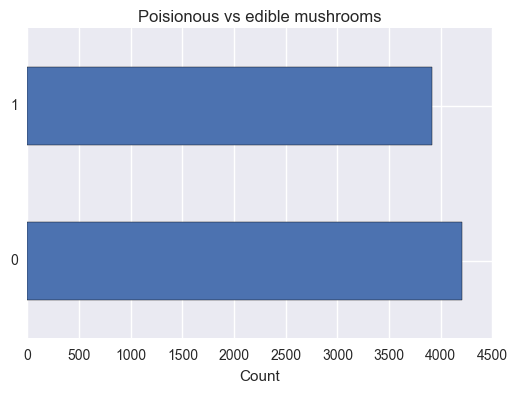

In [11]:
# 2. Plot a histogram to show comparison
mushroomsrel['Poisionous/edible'].value_counts().plot(kind='barh')
plt.title('Poisionous vs edible mushrooms')
plt.xlabel('Count')


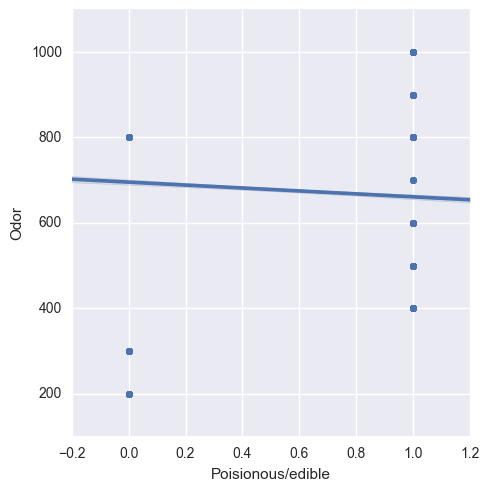

In [12]:
#3. Seaborn plot of odor vs poisonous/edible 
sns.lmplot("Poisionous/edible", 'Odor', data=mushroomsrel, fit_reg=True)

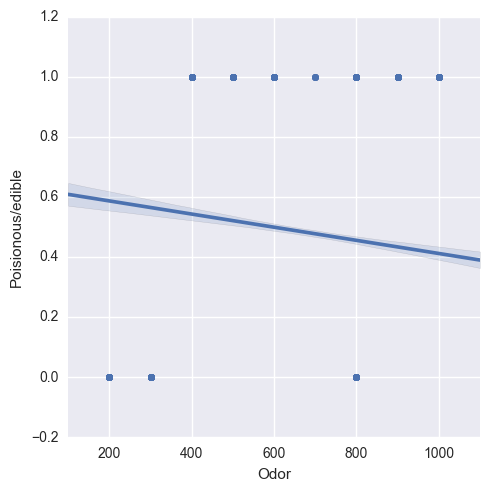

In [13]:
sns.lmplot("Odor", "Poisionous/edible", data=mushroomsrel, fit_reg=True)

The plot shows that most poisionous mushrooms have an odor. For example, if a mushroom has a spicy(1000) odor it is more likely to be poisionous. 
If it has an almond odor(200), it is more likely to be edible. Some mushrooms have no odor and can be either spicy or edible(800) 

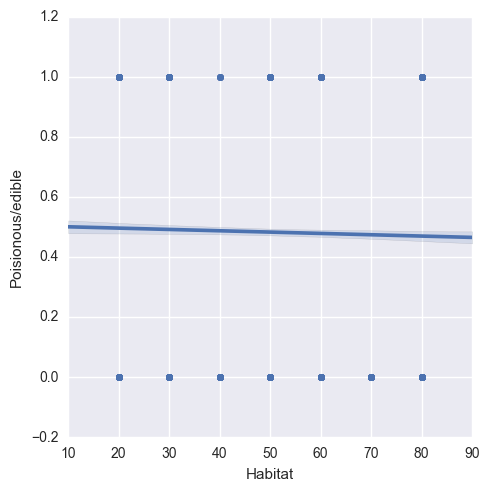

In [14]:
#4. Seaborn plot of poisonous/edible vs habitat 
sns.lmplot("Habitat" ,"Poisionous/edible", data=mushroomsrel, fit_reg=True)

For this plot, it seems that regardless of if a mushroom is edible or poisionous, they are likely to be found
in the same place. The only notable difference is the waste habitat(70) which seems to only have edible mushrooms. 

# Using scikit-learn to Analyze the Mushrooms Data


In [15]:
# import scikit-learn's predictive classifiers and 
# metrics for calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
# Splitting test train set, with 20% of the data as the validation set
train, test = train_test_split(mushroomsrel, test_size = 0.2) 

In [17]:
# Train set
train_y = train['Poisionous/edible']
train_x = train[['Odor', 'Habitat']]

# Test/Validation set
test_y = test['Poisionous/edible']
test_x = test[['Odor', 'Habitat']]

In [18]:
# Create a Logistic Regression classifier
clf = LogisticRegression()

In [19]:
# fit the classifier on the training dataset
clf.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Predict on the test dataset
clf.predict(test_x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
# Print accuracy of the classifier finally !!
accuracy_score(test_y, clf.predict(test_x))

0.60676923076923073

# Conclusions:
---------------

We took the predictor columns - Odor and Habitat to do the current analysis for
the given mushroom dataset.


For training, we use a simple predictive classifier from the scikit-learn
module's class: LogisticRegression. We first split the entire dataset into two parts -
train set and test set. This is done so that after we train our classifier, we can
validate the accuracy (how good our classifier performs) on the test set. For this, we use the class train_test_split, and split the entire dataset into 20% test data, and the rest becomes our
training data.

We fit (i.e. train) the selected classifier with the training dataset, using the fit api method
of sklearn. Once that is done, we can use the predict method on the validation data set (test)
to predict the results for that 20% of the dataset from the trained classifier.

Also, to check the accuracy of the used classifier, we use accuracy_score method from the
metrics module of sklearn.

Accuracy: For the current columns - Odor and Habitat, the accuracy comes out to be around 61.6%
